In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [57]:
df = pd.read_csv('/content/Airbnb_Open_Data.csv', low_memory = False)

In [58]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13241 entries, 0 to 13240
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13241 non-null  int64  
 1   NAME                            13172 non-null  object 
 2   host id                         13241 non-null  int64  
 3   host_identity_verified          13146 non-null  object 
 4   host name                       13213 non-null  object 
 5   neighbourhood group             13214 non-null  object 
 6   neighbourhood                   13224 non-null  object 
 7   lat                             13232 non-null  float64
 8   long                            13232 non-null  float64
 9   country                         13190 non-null  object 
 10  country code                    13161 non-null  object 
 11  instant_bookable                13161 non-null  object 
 12  cancellation_policy             

In [61]:
df.duplicated().value_counts()

,count
False,13241


In [62]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-2019,1.34,4.0,3.0,47.0,NaN,NaN


In [69]:
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

df['price_$'] = df['price_$'].astype(str).str.replace('$', '', regex=False)
df['service_fee_$'] = df['service_fee_$'].astype(str).str.replace('$', '', regex=False)

df['price_$'] = df['price_$'].str.replace(',', '', regex=False)
df['service_fee_$'] = df['service_fee_$'].str.replace(',', '', regex=False)

df.dropna(inplace=True)

df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

df = df.drop(df[df['availability 365'] > 365].index)


In [70]:
df.duplicated().value_counts()

,count
False,9078


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9078 entries, 0 to 13239
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              9078 non-null   object        
 1   NAME                            9078 non-null   object        
 2   host id                         9078 non-null   object        
 3   host_identity_verified          9078 non-null   object        
 4   host name                       9078 non-null   object        
 5   neighbourhood group             9078 non-null   object        
 6   neighbourhood                   9078 non-null   object        
 7   lat                             9078 non-null   float64       
 8   long                            9078 non-null   float64       
 9   country                         9078 non-null   object        
 10  country code                    9078 non-null   object        
 11  instant_

In [79]:
df.duplicated().value_counts()

,count
False,9078


In [73]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000,9078,9078.000000,9078.000000,9078.000000,9078.000000
mean,40.728601,-73.958037,2012.482375,618.566755,123.716568,7.532827,46.476206,2018-02-23 15:45:14.871117056,0.861292,3.007050,2.791364,178.257876
min,40.508680,-74.239860,2003.000000,50.000000,10.000000,-12.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688353,-73.983490,2008.000000,323.000000,65.000000,2.000000,4.000000,2016-09-09 06:00:00,0.090000,2.000000,1.000000,84.000000
50%,40.722020,-73.958470,2012.000000,616.000000,123.000000,3.000000,16.000000,2018-12-31 00:00:00,0.330000,3.000000,1.000000,180.000000
75%,40.763658,-73.942190,2017.000000,910.000000,182.000000,5.000000,62.000000,2019-06-16 00:00:00,1.180000,4.000000,2.000000,272.000000
max,40.908040,-73.729000,2022.000000,1200.000000,240.000000,1250.000000,629.000000,2022-05-21 00:00:00,14.580000,5.000000,121.000000,365.000000
std,0.052270,0.036813,5.754734,335.606949,67.125012,25.096346,66.752825,NaN,1.187698,1.418241,8.297705,108.557644


In [75]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,5279
Private room,3682
Shared room,117


Text(0.5, 1.0, 'Property Types and their count in the Dataset')

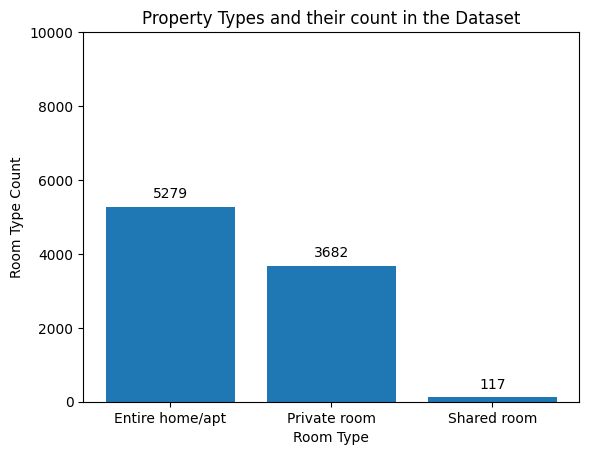

In [77]:
import matplotlib.pyplot as plt
room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"])
plt.bar_label(room_type_bar, labels = property_types.loc[:, "count"], padding = 4)
plt.ylim([0, 10000])
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the Dataset')


In [80]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,4123
Brooklyn,4075
Queens,715
Bronx,124
Staten Island,41


Text(0, 0.5, 'Number of Listings')

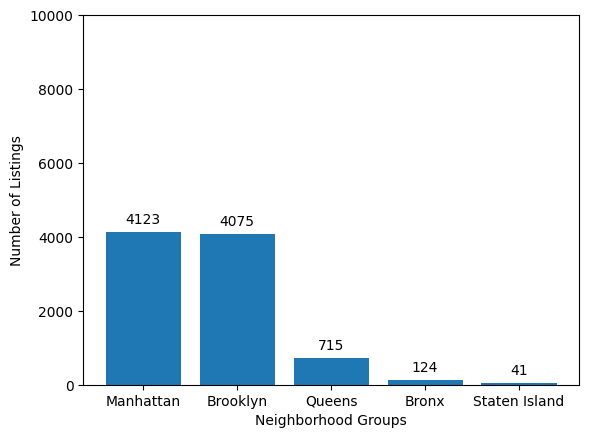

In [82]:
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, "count"])
plt.bar_label(hood_group_bar, labels = hood_group.loc[:, "count"], padding = 4)
plt.ylim([0,10000])
plt.xlabel('Neighborhood Groups')
plt.ylabel('Number of Listings')


Text(0.5, 1.0, 'Average Price per Listings ($) in each Neighborhood Group')

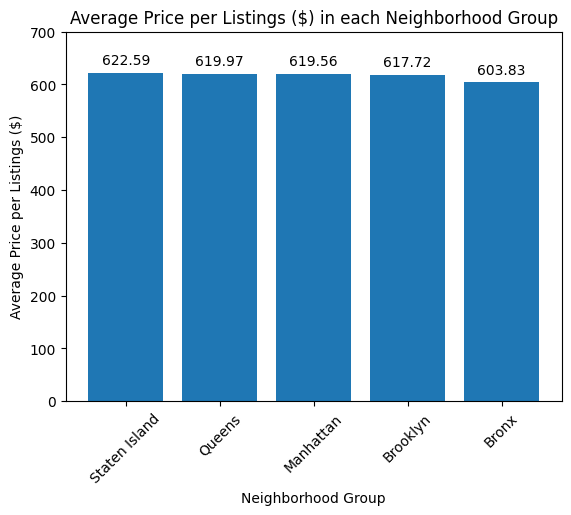

In [83]:
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, 'price_$'])
plt.bar_label(avg_price_bar, labels=round(avg_price.loc[:, 'price_$'], 2), label_type='edge', padding=4)
plt.ylim([0, 700])
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Listings ($)')
plt.xticks(rotation=45)
plt.title('Average Price per Listings ($) in each Neighborhood Group')


Text(0.5, 1.0, 'Average Price ($) for Properties in each Construction Year')

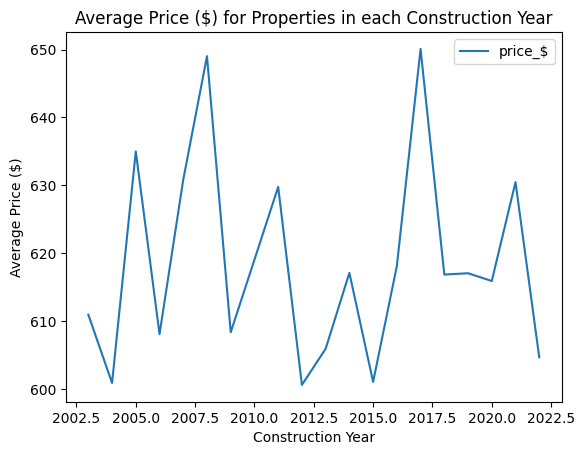

In [84]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for Properties in each Construction Year')


Text(0.5, 1.0, 'Top 10 Hosts by Calculated host Listings Count')

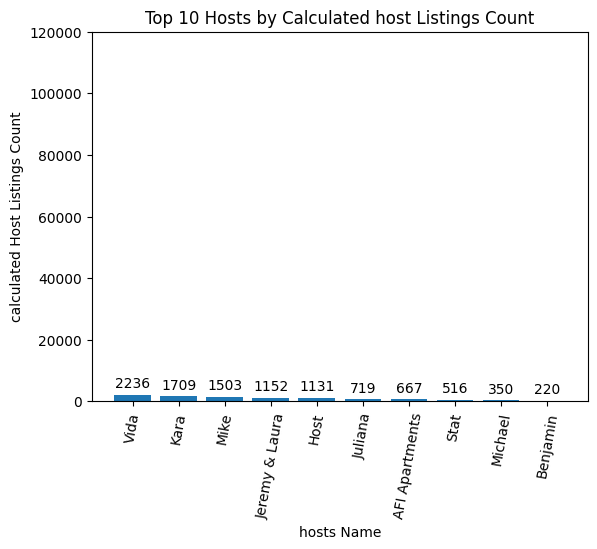

In [85]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count'])
plt.bar_label(hosts_bar, label=hosts.loc[:, 'calculated host listings count'], label_type='edge', padding=3)
plt.xlabel('hosts Name')
plt.ylabel('calculated Host Listings Count')
plt.xticks(rotation=80)
plt.ylim([0, 120000])
plt.title('Top 10 Hosts by Calculated host Listings Count')


In [88]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
unconfirmed,3.009901
verified,3.004191


Text(0.5, 1.0, 'Average Review Rate for each Verification Statistics.')

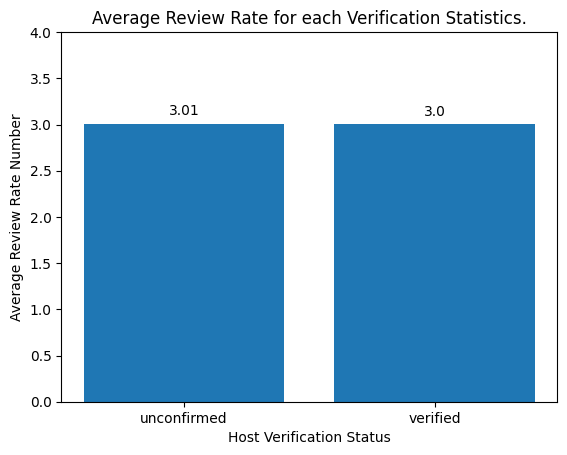

In [89]:
review_bar = plt.bar(review.index, review.loc[:, "review rate number"])
plt.bar_label(review_bar, labels=round(review.loc[:, "review rate number"], 2), padding=4)
plt.ylim([0, 4])
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate for each Verification Statistics.')


Text(0.5, 1.0, 'Average Review Rate for each Verification Status')

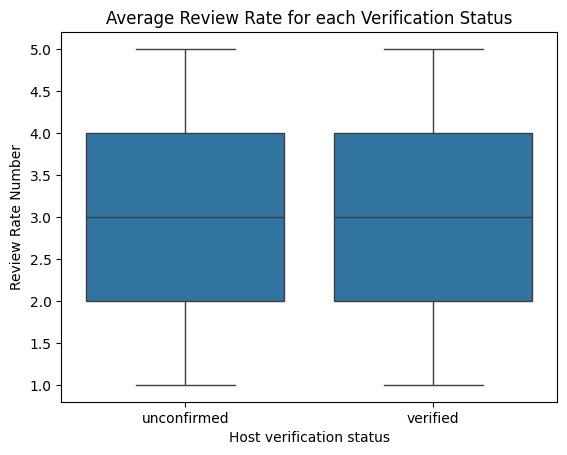

In [90]:
base_color = sns.color_palette()[0]
sns.boxplot(data=df, x="host_identity_verified", y="review rate number", color=base_color)
plt.xlabel('Host verification status')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate for each Verification Status')


In [91]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999911715618579)

Text(0.5, 1.0, 'A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.')

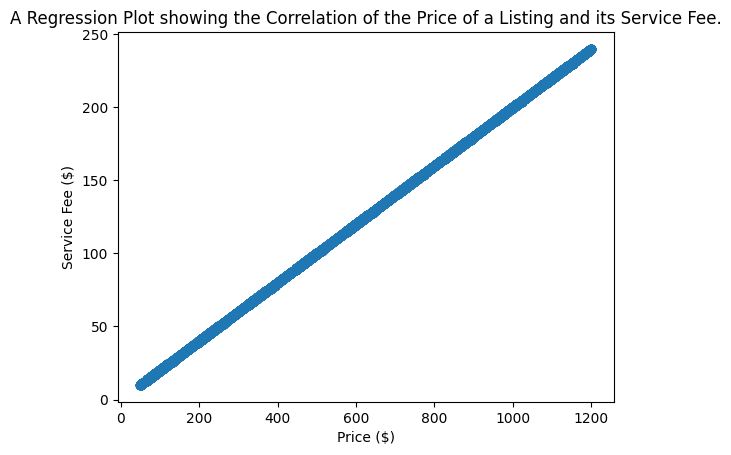

In [92]:
sns.regplot(df, x='price_$', y='service_fee_$')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.')


In [94]:
ARRN = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            2.951220
                    Private room               3.139241
                    Shared room                2.000000
Brooklyn            Entire home/apt            2.980375
                    Private room               3.066628
                    Shared room                3.000000
Manhattan           Entire home/apt            3.008046
                    Private room               3.011012
                    Shared room                2.983333
Queens              Entire home/apt            2.848875
                    Private room               3.002551
                    Shared room                2.833333
Staten Island       Entire home/apt            3.208333
                    Private room               2.705882

Text(0.5, 1.0, 'Average Review Rate for each Room/Property Type in each Neighbourhood Group.')

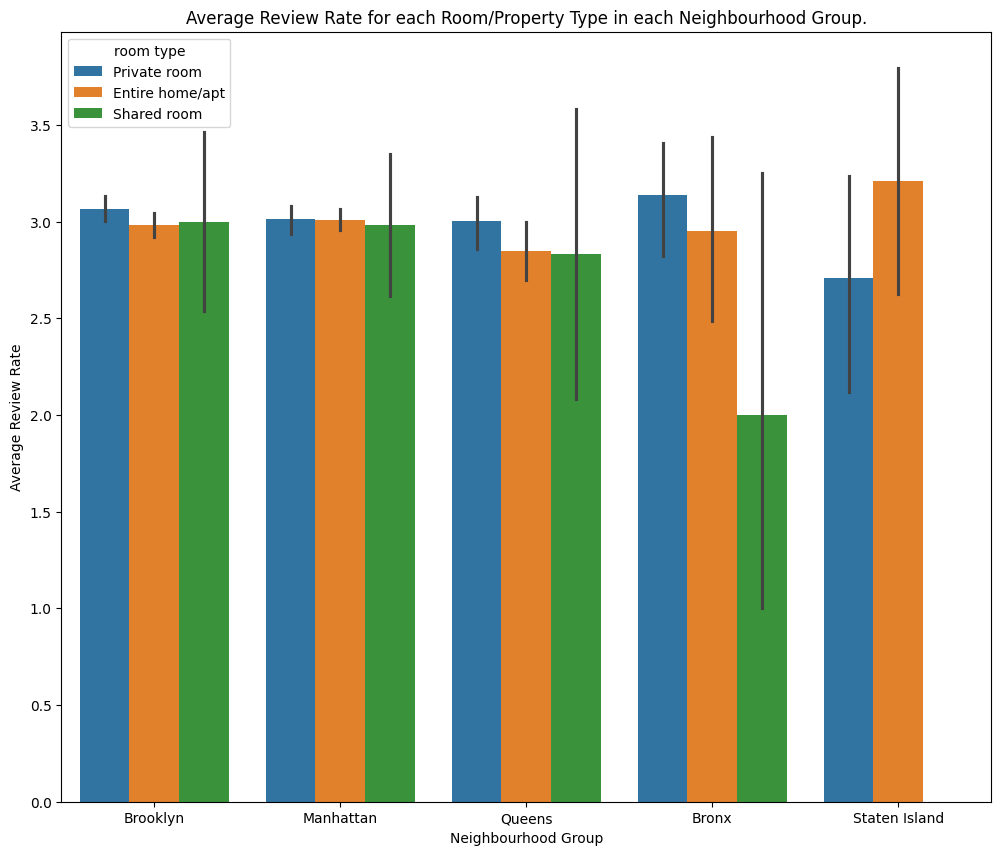

In [95]:
plt.figure(figsize=[12,10])
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.')


Text(0.5, 1.0, 'A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365')

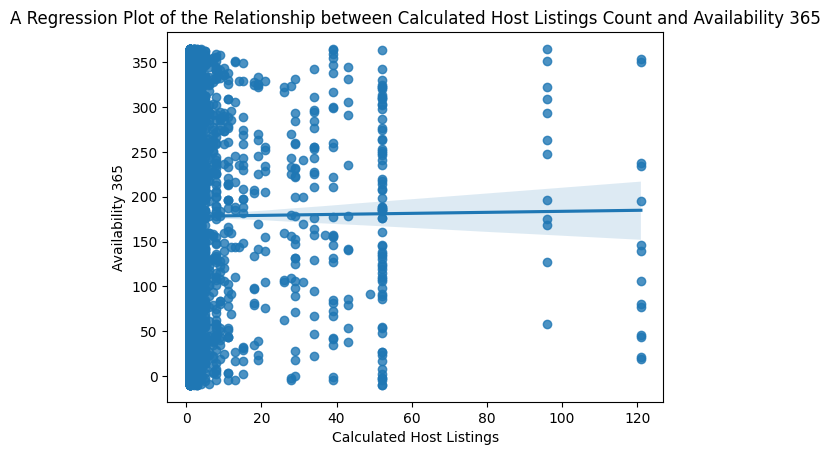

In [96]:
sns.regplot(df, x='calculated host listings count', y='availability 365')
plt.xlabel('Calculated Host Listings')
plt.ylabel('Availability 365')
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365')


In [97]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.004317001219523)